Pod是kubernetes的最小管理单元，在kubernetes中，按照pod的创建方式可以将其分为两类：
> Pod控制器是管理pod的中间层，使用Pod控制器之后，只需要告诉Pod控制器，想要多少个什么样的Pod就可以了，它会创建出满足条件的Pod并确保每一个Pod资源处于用户期望的目标状态。如果Pod资源在运行中出现故障，它会基于指定策略重新编排Pod。
- 自主式pod：kubernetes直接创建出来的Pod，这种pod删除后就没有了，也不会重建
- 控制器创建的pod：kubernetes通过控制器创建的pod，这种pod删除了之后还会自动重建


kubernetes中，有很多类型的pod控制器，每种都有自己的适合的场景，常见的有下面这些：

- ReplicationController：比较原始的pod控制器，已经被废弃，由ReplicaSet替代
- ReplicaSet：保证副本数量一直维持在期望值，并支持pod数量扩缩容，镜像版本升级
- Deployment：通过控制ReplicaSet来控制Pod，并支持滚动升级、回退版本
- Horizontal Pod Autoscaler：可以根据集群负载自动水平调整Pod的数量，实现削峰填谷
- DaemonSet：在集群中的指定Node上运行且仅运行一个副本，一般用于守护进程类的任务
- Job：它创建出来的pod只要完成任务就立即退出，不需要重启或重建，用于执行一次性任务
- Cronjob：它创建的Pod负责周期性任务控制，不需要持续后台运行
- StatefulSet：管理有状态应用

### ReplicaSet
主要作用是保证一定数量的pod正常运行，它会持续监听这些Pod的运行状态，一旦Pod发生故障，就会重启或重建。同时它还支持对pod数量的扩缩容和镜像版本的升降级。

使用以下命令进行缩放和扩展

### Deployment
为了更好的解决服务编排的问题，kubernetes在V1.2版本开始，引入了Deployment控制器。值得一提的是，这种控制器并不直接管理pod，而是通过管理ReplicaSet来简介管理Pod，即：Deployment管理ReplicaSet，ReplicaSet管理Pod。所以Deployment比ReplicaSet功能更加强大。

主要功能有

- 支持ReplicaSet的所有功能
- 支持发布的停止、继续
- 支持滚动升级和回滚版本

#### 版本回退
deployment支持版本升级过程中的暂停、继续功能以及版本回退等诸多功能，下面具体来看.

- kubectl rollout： 版本升级相关功能，支持下面的选项：

- status 显示当前升级状态
- history 显示 升级历史记录
- pause 暂停版本升级过程
- resume 继续已经暂停的版本升级过程
- restart 重启版本升级过程
- undo 回滚到上一级版本（可以使用–to-revision回滚到指定版本）

#### 金丝雀
金丝雀发布
Deployment控制器支持控制更新过程中的控制，如“暂停(pause)”或“继续(resume)”更新操作。

比如有一批新的Pod资源创建完成后立即暂停更新过程，此时，仅存在一部分新版本的应用，主体部分还是旧的版本。然后，再筛选一小部分的用户请求路由到新版本的Pod应用，继续观察能否稳定地按期望的方式运行。确定没问题之后再继续完成余下的Pod资源滚动更新，否则立即回滚更新操作。这就是所谓的金丝雀发布。

### HPA 
Horizontal Pod Autoscaler(HPA)
通过手工执行kubectl scale命令实现Pod扩容或缩容，但是这显然不符合Kubernetes的定位目标–自动化、智能化。 Kubernetes期望可以实现通过监测Pod的使用情况，实现pod数量的自动调整，于是就产生了Horizontal Pod Autoscaler（HPA）这种控制器。

HPA可以获取每个Pod利用率，然后和HPA中定义的指标进行对比，同时计算出需要伸缩的具体值，最后实现Pod的数量的调整。其实HPA与之前的Deployment一样，也属于一种Kubernetes资源对象，它通过追踪分析RC控制的所有目标Pod的负载变化情况，来确定是否需要针对性地调整目标Pod的副本数，这是HPA的实现原理。

### DaemonSet
DaemonSet(DS)
DaemonSet类型的控制器可以保证在集群中的每一台（或指定）节点上都运行一个副本。一般适用于日志收集、节点监控等场景。也就是说，如果一个Pod提供的功能是节点级别的（每个节点都需要且只需要一个），那么这类Pod就适合使用DaemonSet类型的控制器创建。

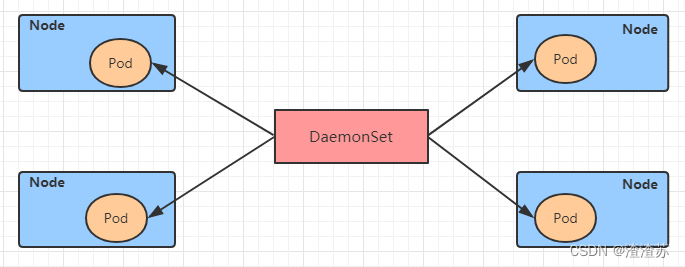

DaemonSet控制器的特点：

每当向集群中添加一个节点时，指定的 Pod 副本也将添加到该节点上
当节点从集群中移除时，Pod 也就被垃圾回收了

### Job 
Job
Job，主要用于负责**批量处理(一次要处理指定数量任务)短暂的一次性(每个任务仅运行一次就结束)**任务。Job特点如下：

当Job创建的pod执行成功结束时，Job将记录成功结束的pod数量
当成功结束的pod达到指定的数量时，Job将完成执行

### CronJob(CJ)
CronJob控制器以 Job控制器资源为其管控对象，并借助它管理pod资源对象，Job控制器定义的作业任务在其控制器资源创建之后便会立即执行，但CronJob可以以类似于Linux操作系统的周期性任务作业计划的方式控制其运行时间点及重复运行的方式。也就是说，CronJob可以在特定的时间点(反复的)去运行job任务


### ingress
kubernetes中的一个对象，作用是定义请求如何转发到service的规则
ingress controller：具体实现反向代理及负载均衡的程序，对ingress定义的规则进行解析，根据配置的规则来实现请求转发，实现方式有很多，比如Nginx, Contour, Haproxy等等

- 用户编写Ingress规则，说明哪个域名对应kubernetes集群中的哪个Service
- Ingress控制器动态感知Ingress服务规则的变化，然后生成一段对应的Nginx反向代理配置
- Ingress控制器会将生成的Nginx配置写入到一个运行着的Nginx服务中，并动态更新
- 到此为止，其实真正在工作的就是一个Nginx了，内部配置了用户定义的请求转发规则
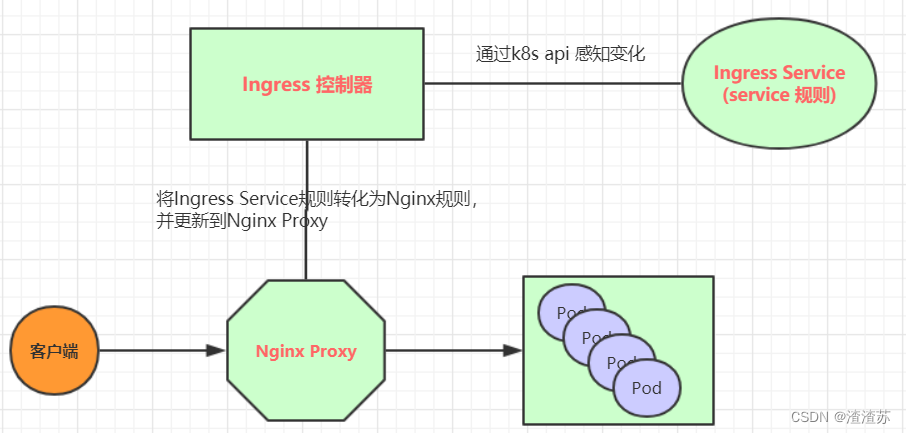



In [ ]:
kubectl scale rs pc-replicaset --replicas=2 -n dev

kubectl set image rs pc-replicaset nginx=nginx:1.17.1  -n dev #进行镜像变更

kubectl delete rs pc-replicaset -n dev #删除replicaSet

kubectl delete -f pc-replicaset.yaml #推荐使用yaml直接删除

kubectl rollout status deploy pc-deployment -n dev  #查看当前更新的状态
 
kubectl rollout history deploy pc-deployment -n dev  #查看更新历史信息


kubectl rollout undo deployment pc-deployment --to-revision=1 -n dev #回退到状态

